In [1]:
import os
os.listdir('../input')

['hacked']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../input/hacked/train.csv')
test = pd.read_csv('../input/hacked/test.csv')
submission = pd.read_csv('../input/hacked/sample_submission.csv')

In [4]:
def Basic_EDA(df):
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)

In [5]:
print("******************************** Train ************************")
Basic_EDA(train)

******************************** Train ************************
----------TOP 5 RECORDS--------
  INCIDENT_ID       DATE  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  \
0   CR_102659  04-JUL-04    0   36   34    2    1    5    6    1    6     1   
1   CR_189752  18-JUL-17    1   37   37    0    0   11   17    1    6     1   
2   CR_184637  15-MAR-17    0    3    2    3    5    1    0    2    3     1   
3   CR_139071  13-FEB-09    0   33   32    2    1    7    1    1    6     1   
4   CR_109335  13-APR-05    0   33   32    2    1    8    3    0    5     1   

   X_11  X_12  X_13  X_14  X_15  MULTIPLE_OFFENSE  
0   174   1.0    92    29    36                 0  
1   236   1.0   103   142    34                 1  
2   174   1.0   110    93    34                 1  
3   249   1.0    72    29    34                 1  
4   174   0.0   112    29    43                 1  
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data colu

In [6]:
print("******************************** Test ************************")
Basic_EDA(test)

******************************** Test ************************
----------TOP 5 RECORDS--------
  INCIDENT_ID       DATE  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  \
0   CR_195453  01-FEB-18    0   30   35    7    3    6    4    0    5     1   
1   CR_103520  05-MAR-04    0   44   44    1    3    7    1    4    6     1   
2   CR_196089  27-JAN-18    0   34   33    3    5    2    7    3    0     1   
3   CR_112195  18-AUG-06    7    3    2    3    5    9    8    0    5     1   
4   CR_149832  31-OCT-11    0    7    8    7    3    2    7    1    5     1   

   X_11  X_12  X_13  X_14  X_15  
0   174   NaN    72   119    23  
1   316   0.0    12    29    34  
2   316   1.0    72     0    34  
3   174   1.0   112    87    34  
4   174   0.0   112    93    43  
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 

In [7]:
print("******************************** Submission ************************")
Basic_EDA(submission)

******************************** Submission ************************
----------TOP 5 RECORDS--------
  INCIDENT_ID MULTIPLE_OFFENSE
0   CR_195453                1
1   CR_103520                0
2           .                .
3           .                .
4   CR_196089                1
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   INCIDENT_ID       7 non-null      object
 1   MULTIPLE_OFFENSE  7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes
None
----------Describe-------------
       INCIDENT_ID MULTIPLE_OFFENSE
count            7                7
unique           6                3
top              .                1
freq             2                3
----------Columns--------------
Index(['INCIDENT_ID', 'MULTIPLE_OFFENSE'], dtype='object')
----------Data Types-----------
INCIDENT_ID 

In [8]:
#we can see that 'Date' column in train data and test data is an object but if we want to manipulate 
#it or want to work on it someway then we have convert it on datetime format
train['DATE'] = pd.to_datetime(train['DATE'])
test['DATE'] = pd.to_datetime(test['DATE'])

In [9]:
#As from our basic EDA we have seen 182 values are missing from Train data X12 feature and 127 values are missing from Test data X12 feature
#we have to handle those first, use True inplace for persisting changes in original data frame.

train["X_12"].fillna(0,inplace = True)
test["X_12"].fillna(0,inplace=True)

In [10]:
#For X12 feature in both the dataframe is float type even though it consist only '0/1', update the dtype as int for better vector scaling
train['X_12'] = train['X_12'].astype(np.int64)
test['X_12'] = test['X_12'].astype(np.int64)

In [11]:
#We will be using only X series feature to train the model,So it will be good to remove date and incident_id
train = train.drop(['INCIDENT_ID','DATE'], axis=1)

In [12]:
train.pivot_table(index=['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15'],aggfunc='size')

X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  X_11  X_12  X_13  X_14  X_15
0    0    1    6    5    3    5    0    5    1     174   1     103   29    34      1
                                                   249   1     72    103   34      1
                                                   290   1     98    29    34      1
                                             2     249   2     113   29    34      1
                                   1    0    2     316   2     84    62    34      1
                                                                                  ..
7    50   51   0    0    9    8    1    6    1     316   1     112   119   34      1
     51   50   7    3    9    8    0    5    1     74    1     112   142   34      1
                                                   174   0     112   29    0       1
                                                   328   1     98    53    34      1
     52   52   3    5    9    8    3    3    20    249   20    72    0

In [13]:
#As we can see from the length is 18781, only this values are unique,  So remove the duplicate values
train.drop_duplicates(keep='first', inplace=True)

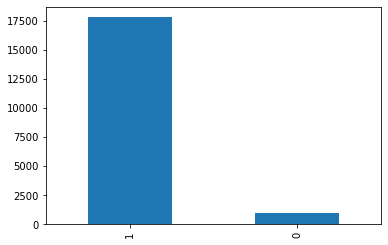

In [14]:
#Check ratio for offense categories distribution in Yes or No results
train['MULTIPLE_OFFENSE'].value_counts().plot.bar()


In [15]:
#It clearly show,more than 90% data is been hacked and its an imbalanced data as majority class belongs to 'hacked' state.
#We have to generate some noise sample for interpolation to avoid overfitting otherwise while trainig the model, It may show biased result. 


In [16]:
#Check correlaton between features to verify what features provide more values on dependent feature
train.corr()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
X_1,1.000000,0.020664,0.020472,-0.011714,-0.036753,0.415051,0.419500,-0.063346,0.024893,0.001830,0.002522,-0.031630,0.113705,-0.009798,0.002083,0.014918
X_2,0.020664,1.000000,0.997189,-0.033954,-0.273082,0.106516,0.063678,-0.030148,-0.013106,-0.017177,0.030671,-0.052008,0.036624,0.001027,-0.013835,-0.018888
X_3,0.020472,0.997189,1.000000,-0.009355,-0.275613,0.110812,0.074018,-0.028640,-0.014611,-0.016276,0.029729,-0.051699,0.034885,-0.000602,-0.017488,-0.018943
X_4,-0.011714,-0.033954,-0.009355,1.000000,0.389826,0.019065,0.063467,0.054286,-0.006340,0.030027,-0.033658,0.037344,-0.038033,-0.029947,0.003444,-0.004006
X_5,-0.036753,-0.273082,-0.275613,0.389826,1.000000,-0.055810,0.007568,0.034249,0.046409,0.043902,-0.040617,0.063396,-0.061608,0.005003,-0.005013,-0.009860
X_6,0.415051,0.106516,0.110812,0.019065,-0.055810,1.000000,0.673056,-0.070290,0.089666,0.017884,0.001131,-0.022154,0.049438,-0.010644,-0.004717,-0.015278
X_7,0.419500,0.063678,0.074018,0.063467,0.007568,0.673056,1.000000,-0.031216,0.021742,0.014182,0.003662,-0.005451,0.024490,0.003728,0.018180,-0.012228
X_8,-0.063346,-0.030148,-0.028640,0.054286,0.034249,-0.070290,-0.031216,1.000000,-0.093274,0.215698,0.000734,0.256813,-0.023232,-0.002718,0.052092,-0.029348
X_9,0.024893,-0.013106,-0.014611,-0.006340,0.046409,0.089666,0.021742,-0.093274,1.000000,0.020899,-0.011251,0.009089,0.016436,-0.272621,0.001472,-0.007319
X_10,0.001830,-0.017177,-0.016276,0.030027,0.043902,0.017884,0.014182,0.215698,0.020899,1.000000,-0.046598,0.891725,0.013785,-0.028505,0.008815,-0.242477


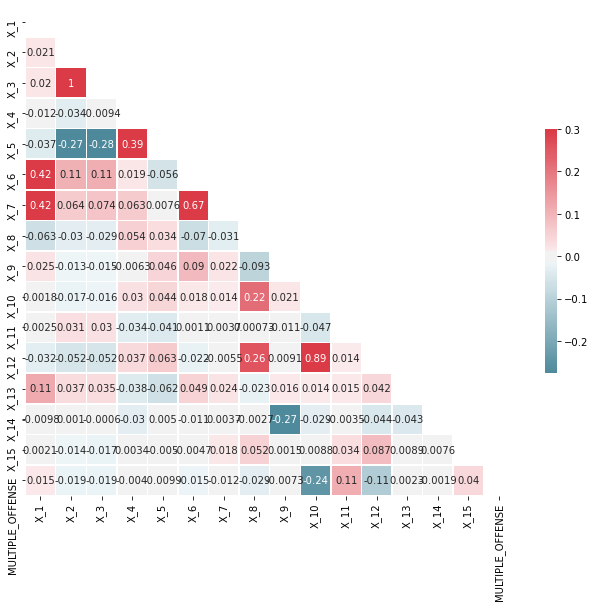

In [17]:
#Plot correlaton for better visualization
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [18]:
#Divide data for checking class distribution and to add noisy sample data
Xtrain = train.iloc[:,:-1]
Ytrain = train["MULTIPLE_OFFENSE"]
Xtest = test.drop(['INCIDENT_ID','DATE'], axis=1)

In [19]:
print("Hacked couns : {}".format(sum(Ytrain==1)))
print("Safe count : {} \n".format(sum(Ytrain==0)))
print("Hacked percentage : {}".format(sum(Ytrain==1)/(sum(Ytrain==1)+sum(Ytrain==0))))
print("Safe percentage : {}".format(sum(Ytrain==0)/(sum(Ytrain==1)+sum(Ytrain==0))))

Hacked couns : 17803
Safe count : 978 

Hacked percentage : 0.9479260955220702
Safe percentage : 0.052073904477929825


In [20]:
#As we mentioned before we have to use noisy sample to increase data 'SMOTE' from imbalance lib
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [21]:
sampl = SMOTE(sampling_strategy='minority')
X_train, y_train = sampl.fit_sample(Xtrain, Ytrain)

In [22]:
print("Hacked couns : {}".format(sum(y_train==1)))
print("Safe count : {} \n".format(sum(y_train==0)))
print("Hacked percentage : {}".format(sum(y_train==1)/(sum(y_train==1)+sum(y_train==0))))
print("Safe percentage : {}".format(sum(y_train==0)/(sum(y_train==1)+sum(y_train==0))))
#We almost create equal count for both the states

Hacked couns : 17803
Safe count : 17803 

Hacked percentage : 0.5
Safe percentage : 0.5


In [23]:
#Split dataframe for model training and validating for 70-30 ratio, 70% will be used for training and rest 30% will be for validating
from sklearn.model_selection import train_test_split
XTrain, XVal, YTrain, YVal = train_test_split(X_train, y_train ,test_size=0.3, random_state=10)

In [24]:
#Use scaler for scaling down all feature values in a single format for providing to model, StandardScaler or MinMax anything we can use
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
X_train_ = sc.fit_transform(XTrain)
X_val_   = sc.transform(XVal)
X_test_  = sc.transform(Xtest)

In [26]:
#instead of using weak classifiers for model training we can use Ensemble methods for better computation
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [27]:
xgb = XGBClassifier()
xgb.fit(X_train_, YTrain)
y_pred = xgb.predict(X_val_)
acc_xgb = round(accuracy_score(y_pred, YVal) * 100, 2)
recall_xgb = recall_score(y_pred, YVal)

In [28]:
print("XGBoost Score:",acc_xgb)
print('XGBoost Recall Score:',recall_xgb)

XGBoost Score: 99.9
XGBoost Recall Score: 0.9986935423665547


In [29]:
#We got preety good Accuracy rate by using XGBoost,
#Even though we will be using Gradient Boosting as well to generate model, just to confirm whether using extreme Gradient model is not overfiing
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
gb = GradientBoostingClassifier()
gb.fit(X_train_, YTrain)
y_pred = gb.predict(X_val_)
acc_gb = round(accuracy_score(y_pred, YVal) * 100, 2)
recall_gb = recall_score(y_pred, YVal)

In [31]:
print("GB Classifier Accuracy Score:",acc_gb)
print('GB Classifier Recall Score:',recall_gb)

GB Classifier Accuracy Score: 99.27
GB Classifier Recall Score: 0.9936389148737137


In [32]:
#By performing both the model, we can clearly see XGBoost is performing better then GB Classifier. 
#and now just predict data using xgb model on X_test_ and submit model.
y_pred = xgb.predict(X_test_)

In [33]:
submission_File = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':y_pred})
submission_File.to_csv('SubmissionFile.csv', index=False)